# Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Loading the Data

In [47]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Exploratory Data Analysis

In [48]:
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'score'}, inplace=True)

In [49]:
df['Gender']=df['Gender'].map({'Male':1,'Female':2})

In [50]:
df.drop(columns={'CustomerID'},axis=1,inplace=True)

In [53]:
df['Gender'].value_counts()

Gender
2    112
1     88
Name: count, dtype: int64

<Axes: >

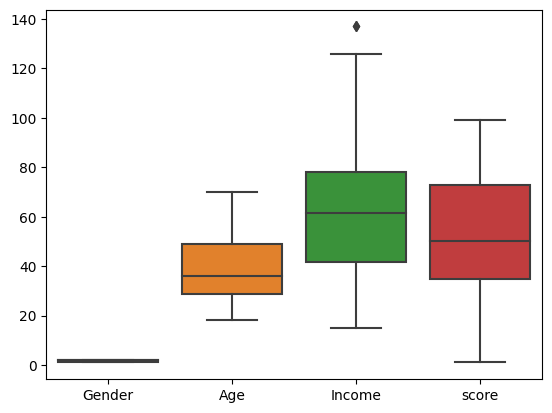

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.countplot(x='Income', data=df)
sns.boxplot(df)


# Custom Kmeans clustering Implementation

In [55]:
import numpy as np

def initialize_random_centroids(K, X):
    m, n = np.shape(X)
    centroids = np.empty((K, n))
    for i in range(K):
        centroids[i] = X[np.random.choice(range(m))]
    return centroids

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(np.power(x1 - x2, 2)))
def closest_centroid(x, centroids, K):
    distances = np.empty(K)
    for i in range(K):
        distances[i] = euclidean_distance(centroids[i], x)
    return np.argmin(distances)
def create_clusters(centroids, K, X):
    m, _ = np.shape(X)
    cluster_idx = np.empty(m)
    for i in range(m):
        cluster_idx[i] = closest_centroid(X[i], centroids, K)
    return cluster_idx

def compute_means(cluster_idx, K, X):
    _, n = np.shape(X)
    centroids = np.empty((K, n))
    for i in range(K):
        points = X[cluster_idx == i]
        centroids[i] = np.mean(points, axis=0)
    return centroids
def run_Kmeans(K, X, max_iterations=500):
    centroids = initialize_random_centroids(K, X)
    for _ in range(max_iterations):
        clusters = create_clusters(centroids, K, X)
        previous_centroids = centroids
        centroids = compute_means(clusters, K, X)
        if np.allclose(previous_centroids, centroids):  # check convergence
            break
    return clusters, centroids



In [200]:
X=df.values

clusters, centroids = run_Kmeans(7, X)


# Calculate silhouette

In [144]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, clusters)
print(f'Silhouette score: {score:.2f}')


Silhouette score: 0.45


In [145]:
centroids

array([[  1.57142857,  37.42857143, 123.57142857,  48.14285714],
       [  1.55555556,  32.72222222,  83.11111111,  82.41666667],
       [  1.59090909,  25.27272727,  25.72727273,  79.36363636],
       [  1.59090909,  44.31818182,  25.77272727,  20.27272727],
       [  1.38709677,  41.74193548,  84.06451613,  16.25806452],
       [  1.56818182,  56.34090909,  53.70454545,  49.38636364],
       [  1.65789474,  27.        ,  56.65789474,  49.13157895]])

This was the most optimal centriod location
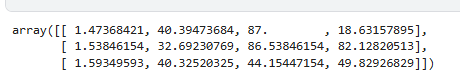
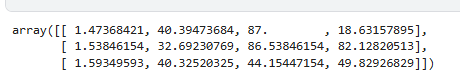

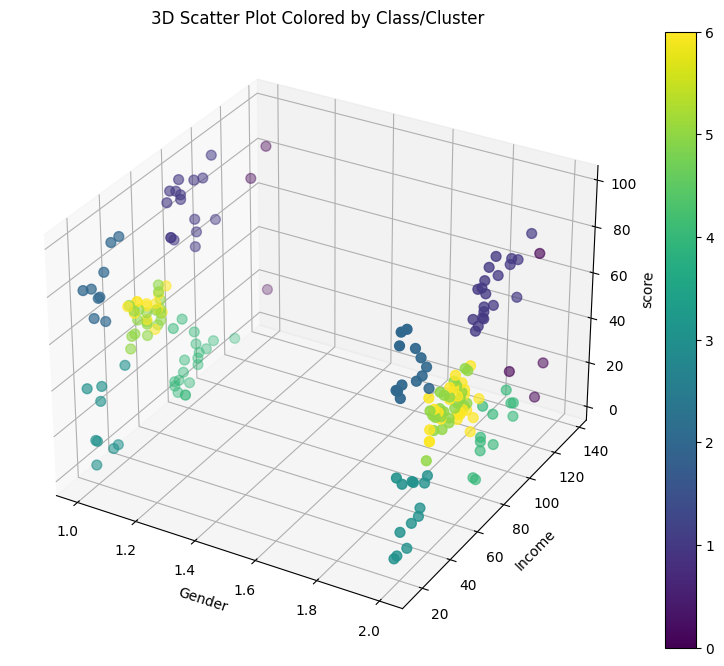

In [199]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Replace 'col1', 'col2', 'col3', and 'class' with your actual DataFrame column names
sc = ax.scatter(
    df['Gender'],
    df['Income'],
    df['score'],
    c=clusters,          # Color points by class or cluster label
    cmap='viridis',         # Choose your color map
    s=50                  # Marker size
)

ax.set_xlabel('Gender')
ax.set_ylabel('Income')
ax.set_zlabel('score')
plt.title('3D Scatter Plot Colored by Class/Cluster')

# Optional: add colorbar if your label is numeric
plt.colorbar(sc)

plt.show()


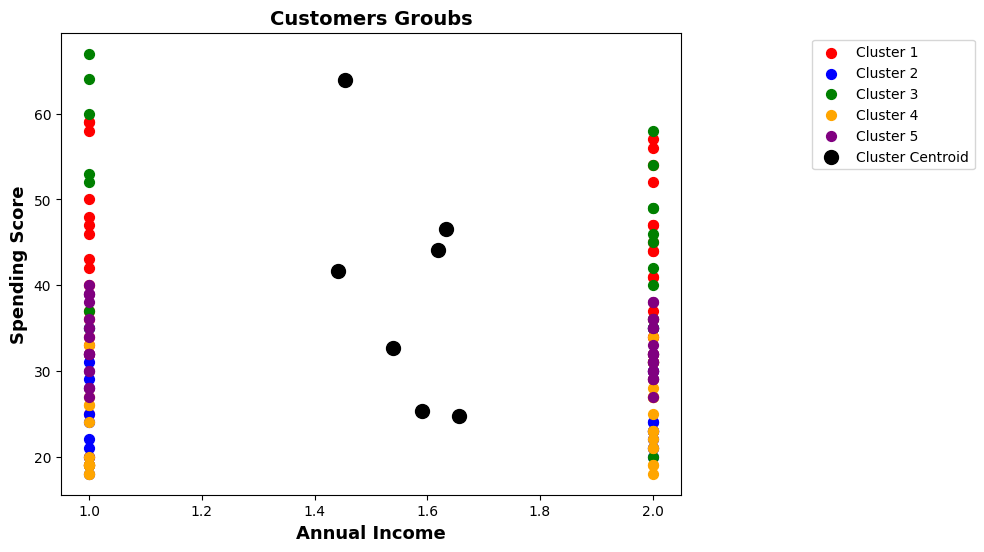

In [201]:
y=clusters
plt.figure(figsize=(8,6))
plt.scatter(X[Y == 0,0] , X[Y == 0,1] , c="red"     , s=50 , label="Cluster 1")
plt.scatter(X[Y == 1,0] , X[Y == 1,1] , c="blue"    , s=50 , label="Cluster 2")
plt.scatter(X[Y == 2,0] , X[Y == 2,1] , c="green"   , s=50 , label="Cluster 3")
plt.scatter(X[Y == 3,0] , X[Y == 3,1] , c="orange"  , s=50 , label="Cluster 4")
plt.scatter(X[Y == 4,0] , X[Y == 4,1] , c="purple"  , s=50 , label="Cluster 5")
plt.scatter(Kmeans.cluster_centers_[:,0] , Kmeans.cluster_centers_[:,1] , c="black" , s=100 , label="Cluster Centroid" )
plt.legend(loc="upper left", bbox_to_anchor=(1.2, 1))
plt.title("Customers Groubs", fontweight="bold", fontsize=14)
plt.xlabel("Annual Income", fontweight="bold", fontsize=13)
plt.ylabel("Spending Score", fontweight="bold", fontsize=13)
plt.show()

# Using Sklearn Kmeans Clustering

In [207]:
Kmeans = KMeans(n_clusters=7, init="k-means++" , n_init = "auto" , random_state=2)
Y = Kmeans.fit_predict(X)

score = silhouette_score(X, Y)
print(f'Silhouette score: {score:.2f}')

Silhouette score: 0.41


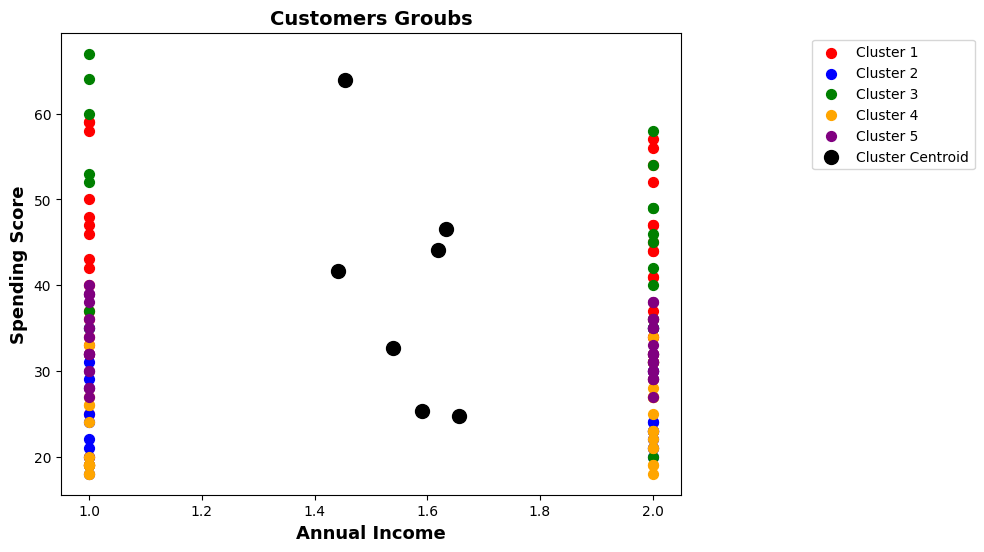

In [208]:
plt.figure(figsize=(8,6))
plt.scatter(X[Y == 0,0] , X[Y == 0,1] , c="red"     , s=50 , label="Cluster 1")
plt.scatter(X[Y == 1,0] , X[Y == 1,1] , c="blue"    , s=50 , label="Cluster 2")
plt.scatter(X[Y == 2,0] , X[Y == 2,1] , c="green"   , s=50 , label="Cluster 3")
plt.scatter(X[Y == 3,0] , X[Y == 3,1] , c="orange"  , s=50 , label="Cluster 4")
plt.scatter(X[Y == 4,0] , X[Y == 4,1] , c="purple"  , s=50 , label="Cluster 5")
plt.scatter(Kmeans.cluster_centers_[:,0] , Kmeans.cluster_centers_[:,1] , c="black" , s=100 , label="Cluster Centroid" )
plt.legend(loc="upper left", bbox_to_anchor=(1.2, 1))
plt.title("Customers Groubs", fontweight="bold", fontsize=14)
plt.xlabel("Annual Income", fontweight="bold", fontsize=13)
plt.ylabel("Spending Score", fontweight="bold", fontsize=13)
plt.show()

# Using Dbscan

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D


X = df.values

# Fit DBSCAN
model = DBSCAN(eps=15, min_samples=3)
labels = model.fit_predict(X)
print(labels)

[ 0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
 -1  1 -1  1 -1  1 -1  1]


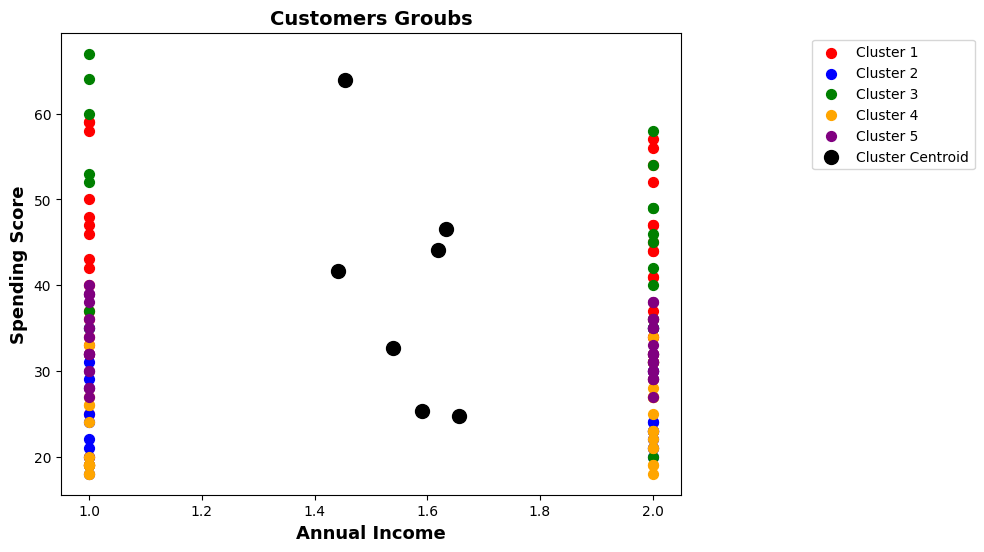

In [217]:
y=labels
plt.figure(figsize=(8,6))
plt.scatter(X[Y == 0,0] , X[Y == 0,1] , c="red"     , s=50 , label="Cluster 1")
plt.scatter(X[Y == 1,0] , X[Y == 1,1] , c="blue"    , s=50 , label="Cluster 2")
plt.scatter(X[Y == 2,0] , X[Y == 2,1] , c="green"   , s=50 , label="Cluster 3")
plt.scatter(X[Y == 3,0] , X[Y == 3,1] , c="orange"  , s=50 , label="Cluster 4")
plt.scatter(X[Y == 4,0] , X[Y == 4,1] , c="purple"  , s=50 , label="Cluster 5")
plt.scatter(Kmeans.cluster_centers_[:,0] , Kmeans.cluster_centers_[:,1] , c="black" , s=100 , label="Cluster Centroid" )
plt.legend(loc="upper left", bbox_to_anchor=(1.2, 1))
plt.title("Customers Groubs", fontweight="bold", fontsize=14)
plt.xlabel("Annual Income", fontweight="bold", fontsize=13)
plt.ylabel("Spending Score", fontweight="bold", fontsize=13)
plt.show()

[ 0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
 -1  1 -1  1 -1  1 -1  1]


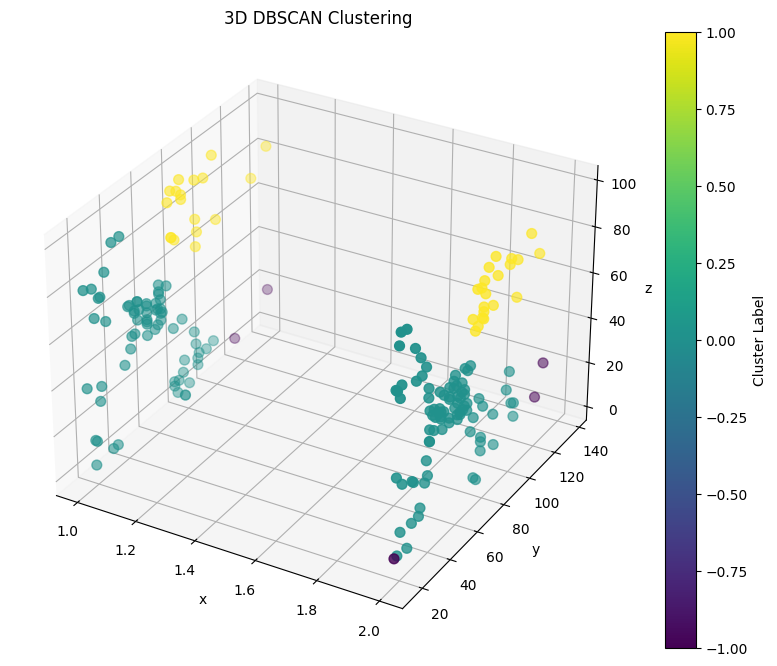

In [ ]:
# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df['Gender'],
    df['Income'],
    df['score'],
    c=labels,           # Color by cluster (noise as -1)
    cmap='viridis',
    s=50
)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("3D DBSCAN Clustering")
plt.colorbar(scatter, label='Cluster Label')
plt.show()

In [160]:
score = silhouette_score(X, labels)
print(f'Silhouette score: {score:.2f}')

Silhouette score: 0.29


In [215]:
from sklearn.cluster import AgglomerativeClustering

# Choose the number of clusters or use distance_threshold for automatic
model = AgglomerativeClustering(n_clusters=15)
labels = model.fit_predict(X)   # X is your features, e.g., df[['feature1', 'feature2', ...]].values

score = silhouette_score(X, labels)
print(f'Silhouette score: {score:.2f}')



Silhouette score: 0.34


# Analytics

> From the Analysis, using a Kmeans clustering algorithm with 5-7 clusters yield the best silhouette score